# EDA and Modeling Strategy Overview

# 🎧 Spotify Dataset: Exploratory Data Analysis & Modeling Strategy

This notebook presents exploratory data analysis (EDA) and outlines a modeling strategy for analyzing Spotify music data, intended for presentation using Voilà.

## 📁 1. Dataset Overview
**Files in use:**
- `spotify_artists.csv`
- `spotify_albums.csv`
- `spotify_tracks.csv`
- `lyrics_features.csv`
- `low_level_audio_features.csv`


In [1]:
import pandas as pd

artists = pd.read_csv("../../data/raw/spotify_artists.csv")
albums = pd.read_csv("../../data/raw/spotify_albums.csv")
tracks = pd.read_csv("../../data/raw/spotify_tracks.csv")
lyrics = pd.read_csv("../../data/raw/lyrics_features.csv")
audio = pd.read_csv("../../data/raw/low_level_audio_features.csv")

# Basic preview
datasets = {
    "Artists": artists,
    "Albums": albums,
    "Tracks": tracks,
    "Lyrics": lyrics,
    "Audio": audio,
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    print(df.shape)
    print(df.info())


=== Artists ===
(56129, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56129 entries, 0 to 56128
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         56129 non-null  int64 
 1   artist_popularity  56129 non-null  int64 
 2   followers          56129 non-null  int64 
 3   genres             56129 non-null  object
 4   id                 56129 non-null  object
 5   name               56128 non-null  object
 6   track_id           56129 non-null  object
 7   track_name_prev    56129 non-null  object
 8   type               56129 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.9+ MB
None

=== Albums ===
(75511, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 

## 📊 2. Exploratory Data Analysis (EDA)

- Track popularity distributions
- Top genres/artists
- Relationships between audio features and popularity
- Correlations between lyric features and other track properties


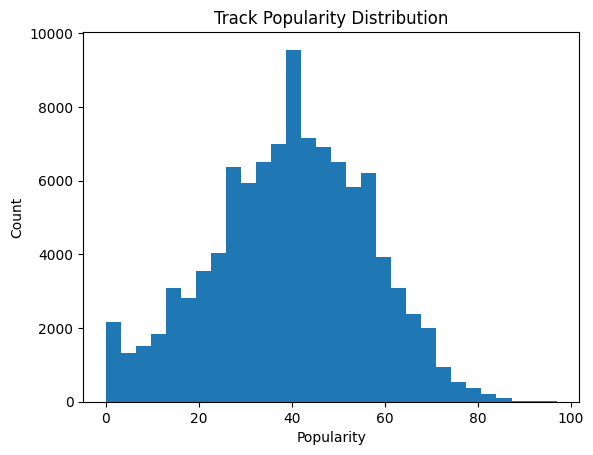

In [2]:
# Example: Track popularity distribution
import matplotlib.pyplot as plt

plt.hist(tracks['popularity'].dropna(), bins=30)
plt.title('Track Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


## 📊 2. Comprehensive Descriptive Analysis

This section provides a detailed descriptive analysis of our Spotify dataset, exploring distributions, relationships, and patterns in the data.

### 2.1 Dataset Overview and Summary Statistics


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

# Display basic summary statistics for numerical features
print("Summary Statistics for Track Features:")
display(tracks.describe().T.style.background_gradient(cmap='Blues'))

# Display dataset information
print(f"\nTracks Dataset Shape: {tracks.shape}")

# Check for columns before accessing them
artist_id_col = [col for col in tracks.columns if 'artist' in col.lower() and 'id' in col.lower()]
if artist_id_col and len(artist_id_col) > 0:
    print(f"Number of Artists: {tracks[artist_id_col[0]].nunique()}")
else:
    print("Artist ID column not found in tracks DataFrame")

album_id_col = [col for col in tracks.columns if 'album' in col.lower() and 'id' in col.lower()]
if album_id_col and len(album_id_col) > 0:
    print(f"Number of Albums: {tracks[album_id_col[0]].nunique()}")
else:
    print("Album ID column not found in tracks DataFrame")

date_col = [col for col in tracks.columns if 'date' in col.lower() or 'year' in col.lower()]
if date_col and len(date_col) > 0:
    print(f"Date/Year Range: {tracks[date_col[0]].min()} to {tracks[date_col[0]].max()}")
else:
    print("Date/Year column not found in tracks DataFrame")

# Check missing values
print("\nMissing Values Per Column:")
missing_values = tracks.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(tracks) * 100).round(2)
missing_df = pd.DataFrame({'Count': missing_values, 'Percentage (%)': missing_percent})
display(missing_df[missing_df['Count'] > 0])


Summary Statistics for Track Features:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,101939.000000,50969.000000,29427.398883,0.000000,25484.500000,50969.000000,76453.500000,101938.000000
acousticness,101939.000000,0.352124,0.334855,0.000000,0.040700,0.238000,0.645000,0.996000
danceability,101939.000000,0.586015,0.177724,0.000000,0.480000,0.610000,0.714000,0.989000
disc_number,101939.000000,1.032166,0.566789,1.000000,1.000000,1.000000,1.000000,81.000000
duration_ms,101939.000000,246770.803304,190430.295141,1155.000000,184000.000000,216893.000000,261055.000000,5505831.000000
energy,101939.000000,0.586479,0.260170,0.000000,0.411000,0.629000,0.798000,1.000000
instrumentalness,101939.000000,0.148776,0.304024,0.000000,0.000000,0.000037,0.034400,1.000000
key,101939.000000,5.270858,3.577679,0.000000,2.000000,5.000000,8.000000,11.000000
liveness,101939.000000,0.197640,0.175391,0.000000,0.095600,0.124000,0.241000,0.999000
loudness,101939.000000,-9.462720,6.198508,-60.000000,-11.149000,-7.599000,-5.509000,2.719000



Tracks Dataset Shape: (101939, 32)
Number of Artists: 54673
Number of Albums: 75503
Date/Year column not found in tracks DataFrame

Missing Values Per Column:


,Count,Percentage (%)


### 2.2 Correlation Analysis - Audio Features

Examining relationships between key audio features and popularity.


In [ ]:
# Select numeric columns for correlation analysis
numeric_columns = tracks.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude ID columns more generically
excluded_patterns = ['id', '_id', 'index', 'year']
correlation_features = [col for col in numeric_columns if not any(pattern in col.lower() for pattern in excluded_patterns)]

# Create correlation matrix
corr_matrix = tracks[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Audio Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot correlation with popularity specifically
if 'popularity' in correlation_features:
    popularity_corr = corr_matrix['popularity'].sort_values(ascending=False).drop('popularity')
    plt.figure(figsize=(12, 8))
    popularity_corr.plot(kind='bar', color=sns.color_palette('viridis', len(popularity_corr)))
    plt.title('Correlation of Features with Track Popularity', fontsize=16)
    plt.ylabel('Correlation Coefficient')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()


### 2.3 Distribution Analysis - Key Audio Features

Visualizing the distribution of important audio characteristics.


Audio features being analyzed: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


IndexError: list index out of range

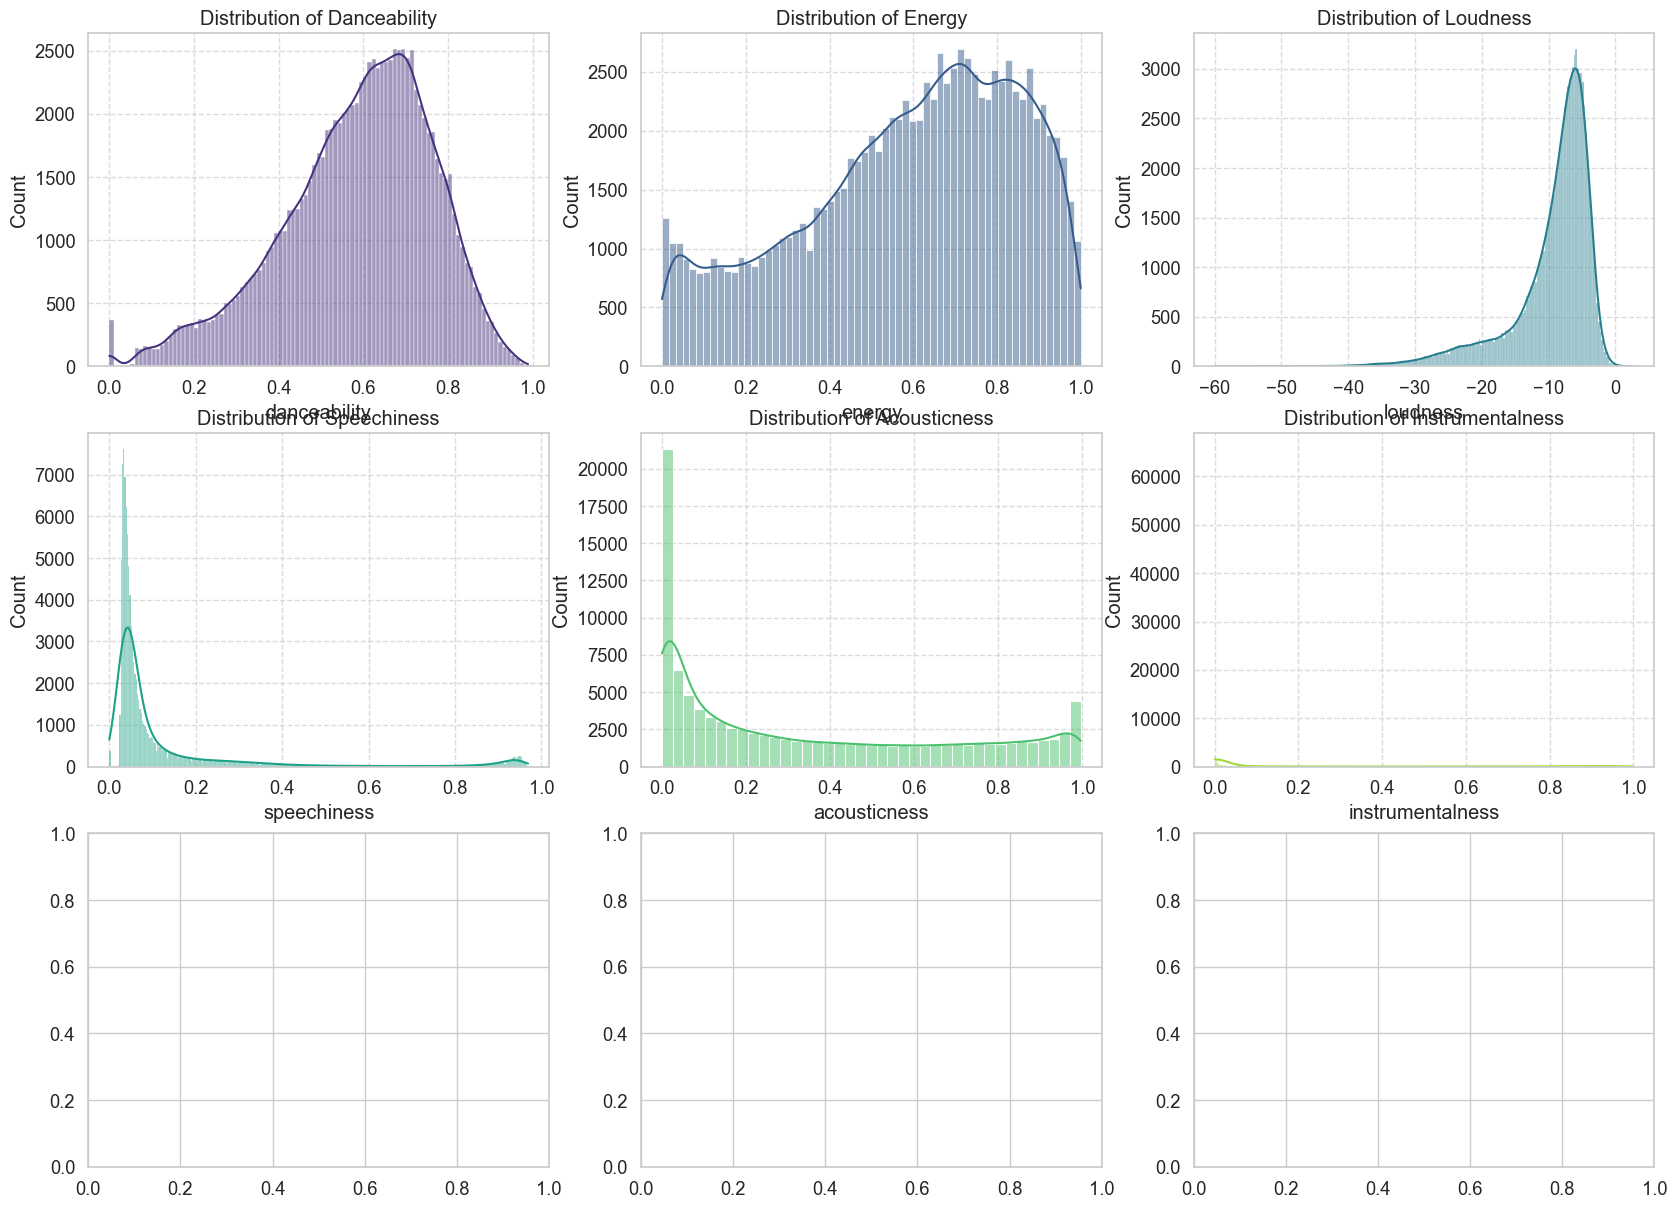

In [6]:
# Define key audio features to visualize
potential_audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# If none of these standard features exist, try to find numeric columns that might be audio features
audio_features = [feature for feature in potential_audio_features if feature in tracks.columns]

if not audio_features:
    # Look for any numeric columns that might be audio features
    numeric_cols = tracks.select_dtypes(include=['float64', 'int64']).columns.tolist()
    # Exclude likely non-feature columns
    excluded_patterns = ['id', '_id', 'index', 'year', 'date', 'popularity', 'count']
    audio_features = [col for col in numeric_cols if not any(pattern in col.lower() for pattern in excluded_patterns)]
    # Limit to 9 features for the grid
    audio_features = audio_features[:9]

print(f"Audio features being analyzed: {audio_features}")

# Create distribution plots for audio features
if audio_features:
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    axes = axes.flatten()
    
    for i, feature in enumerate(audio_features[:9]):  # Limit to 9 features for 3x3 grid
        sns.histplot(tracks[feature].dropna(), kde=True, ax=axes[i], color=sns.color_palette('viridis')[i])
        axes[i].set_title(f'Distribution of {feature.capitalize()}')
        axes[i].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Create violin plots to compare distributions
    plt.figure(figsize=(16, 8))
    # Normalize features for comparison (except tempo)
    plot_features = [f for f in audio_features if f != 'tempo' and f != 'loudness']
    
    if plot_features:
        normalized_df = tracks[plot_features].copy()
        for feature in plot_features:
            if tracks[feature].min() != tracks[feature].max():  # Avoid division by zero
                normalized_df[feature] = (tracks[feature] - tracks[feature].min()) / (tracks[feature].max() - tracks[feature].min())
        
        # Melt the dataframe for seaborn
        melted_df = pd.melt(normalized_df, var_name='Feature', value_name='Value')
        
        # Plot violin plot
        sns.violinplot(x='Feature', y='Value', data=melted_df, palette='viridis')
        plt.title('Comparison of Normalized Audio Feature Distributions', fontsize=16)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### 2.4 Categorical Data Analysis - Genres & Artists

Analyzing the distribution of genres and top artists.


In [8]:
# Top genres analysis (if genre data is available)
if 'genre' in tracks.columns or 'genres' in tracks.columns:
    genre_col = 'genre' if 'genre' in tracks.columns else 'genres'
    
    # Handle potential list-like genre entries
    if isinstance(tracks[genre_col].iloc[0], str) and '[' in tracks[genre_col].iloc[0]:
        # Convert string representations of lists to actual lists
        tracks['genre_list'] = tracks[genre_col].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else [x])
        # Explode the lists into separate rows
        genres_exploded = tracks[['genre_list']].explode('genre_list')
        genre_counts = genres_exploded['genre_list'].value_counts().head(15)
    else:
        genre_counts = tracks[genre_col].value_counts().head(15)
    
    plt.figure(figsize=(14, 8))
    genre_counts.plot(kind='bar', color=sns.color_palette('viridis', len(genre_counts)))
    plt.title('Top 15 Genres in the Dataset', fontsize=16)
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Top artists analysis - look for any column that might contain artist names
artist_col = [col for col in tracks.columns if 'artist' in col.lower() and ('name' in col.lower() or col.lower() == 'artist')]
if artist_col and len(artist_col) > 0:
    artist_column = artist_col[0]
    print(f"Using {artist_column} for artist analysis")
    top_artists = tracks[artist_column].value_counts().head(10)
    
    plt.figure(figsize=(14, 8))
    top_artists.plot(kind='bar', color=sns.color_palette('viridis', len(top_artists)))
    plt.title('Top 10 Artists by Track Count', fontsize=16)
    plt.xlabel('Artist')
    plt.ylabel('Number of Tracks')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Artists popularity comparison (if popularity data exists)
    if 'popularity' in tracks.columns and 'artist_name' in tracks.columns:
        top_artists_list = top_artists.index.tolist()
        artist_popularity = tracks[tracks['artist_name'].isin(top_artists_list)].groupby('artist_name')['popularity'].mean().sort_values(ascending=False)
        
        plt.figure(figsize=(14, 8))
        artist_popularity.plot(kind='bar', color=sns.color_palette('viridis', len(artist_popularity)))
        plt.title('Average Popularity of Top 10 Artists', fontsize=16)
        plt.xlabel('Artist')
        plt.ylabel('Average Popularity Score')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


### 2.5 Time-Based Analysis

Examining trends over time based on release dates.


In [9]:
# Check if release_date is available
if 'release_date' in tracks.columns:
    # Convert to datetime if not already
    if not pd.api.types.is_datetime64_any_dtype(tracks['release_date']):
        try:
            tracks['release_date'] = pd.to_datetime(tracks['release_date'])
        except:
            # If conversion fails, try extracting just the year
            try:
                tracks['release_year'] = tracks['release_date'].str.extract(r'(\d{4})').astype(float)
            except:
                print("Could not parse release dates")
    
    # If conversion successful, extract year for grouping
    if pd.api.types.is_datetime64_any_dtype(tracks['release_date']):
        tracks['release_year'] = tracks['release_date'].dt.year
        
        # Group tracks by year and count
        yearly_tracks = tracks.groupby('release_year').size()
        
        plt.figure(figsize=(16, 8))
        yearly_tracks.plot(kind='line', marker='o', linestyle='-', linewidth=2, 
                         color='darkblue', markersize=8)
        plt.title('Number of Tracks Released by Year', fontsize=16)
        plt.xlabel('Year')
        plt.ylabel('Number of Tracks')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # Analyze popularity trends over time
        if 'popularity' in tracks.columns:
            yearly_popularity = tracks.groupby('release_year')['popularity'].mean()
            
            plt.figure(figsize=(16, 8))
            yearly_popularity.plot(kind='line', marker='o', linestyle='-', linewidth=2, 
                                 color='darkgreen', markersize=8)
            plt.title('Average Track Popularity by Release Year', fontsize=16)
            plt.xlabel('Year')
            plt.ylabel('Average Popularity')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()


### 2.6 Feature Relationship Analysis

Exploring relationships between different audio features.


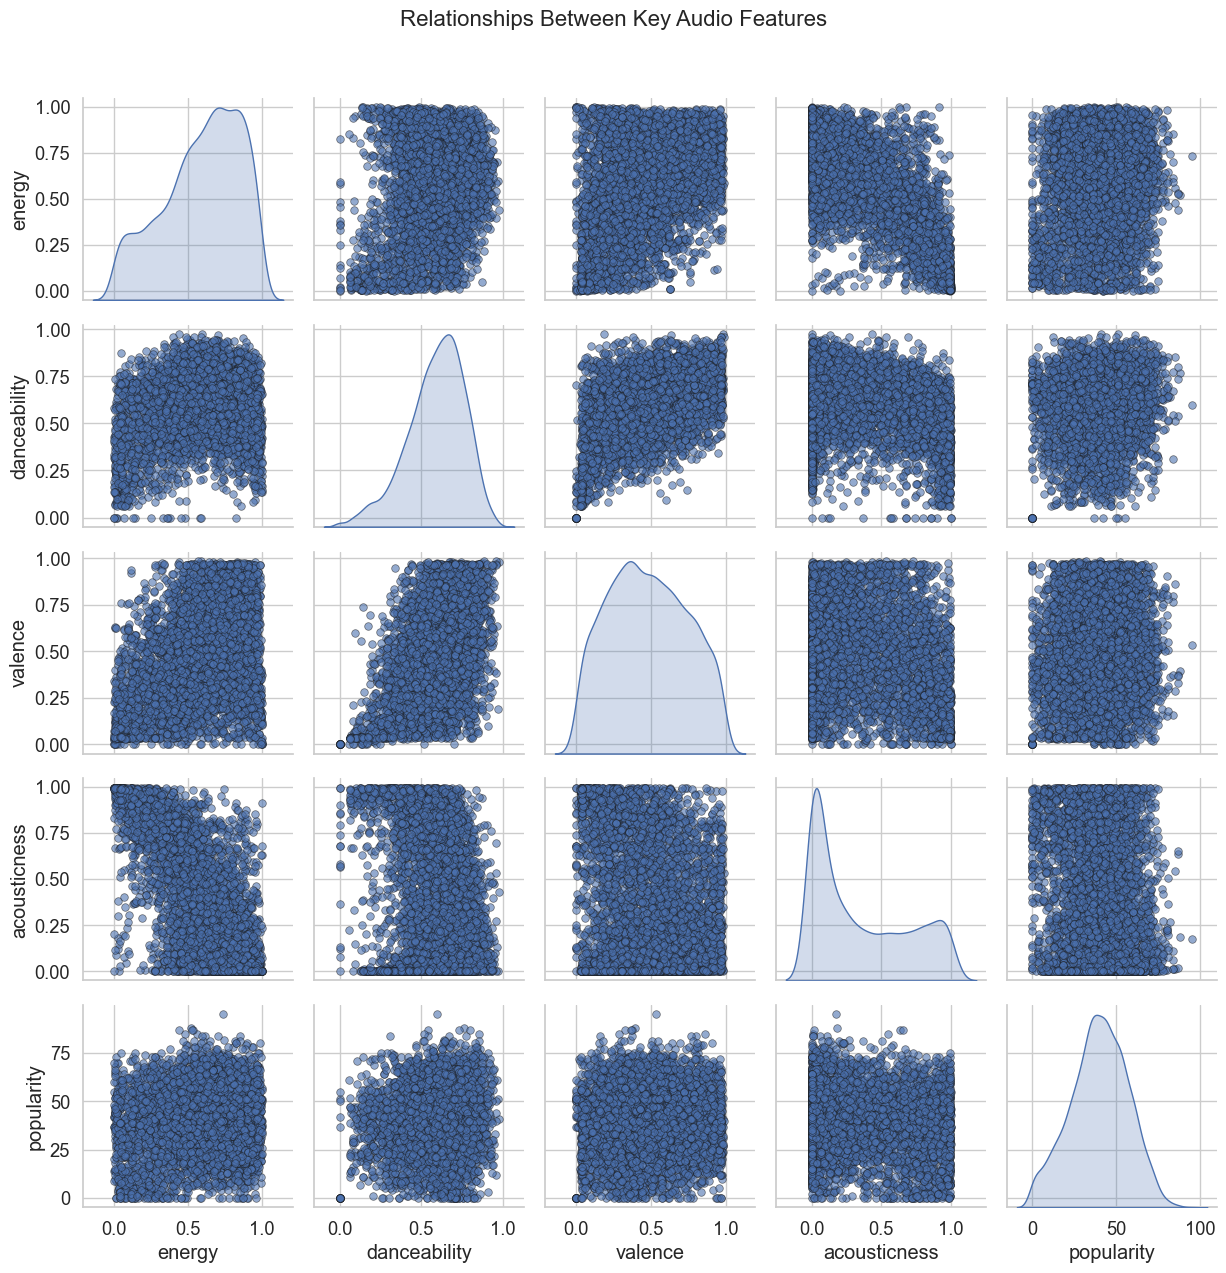

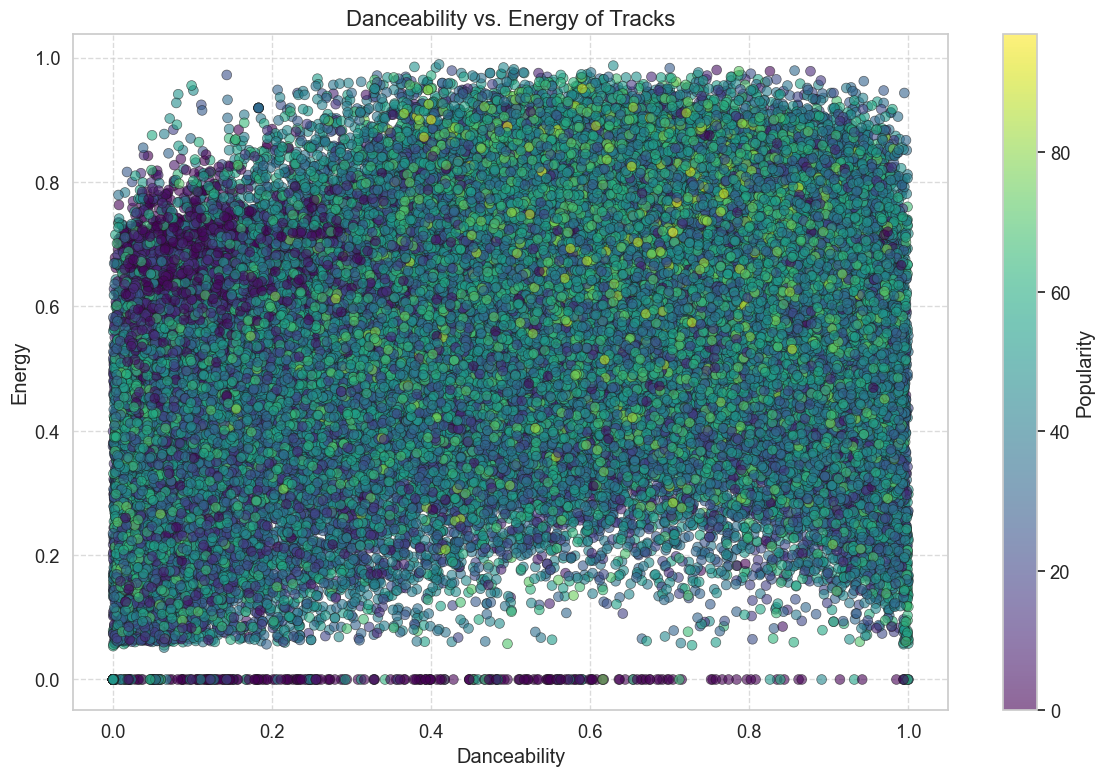

In [10]:
# Pairplot of selected features - check if we have enough audio features first
if len(audio_features) >= 2:
    # If we have standard audio features, use them
    potential_key_features = ['energy', 'danceability', 'valence', 'acousticness']
    if 'popularity' in tracks.columns:
        potential_key_features.append('popularity')
    
    key_features = [f for f in potential_key_features if f in tracks.columns]
    
    # If we don't have standard features, use the audio_features we found earlier
    if len(key_features) < 2 and len(audio_features) >= 2:
        key_features = audio_features[:5]  # Limit to 5 features for readability
    
    if len(key_features) > 2:
        # Sample data if dataset is large to avoid slow plotting
        sample_size = min(5000, tracks.shape[0])
        sample_df = tracks[key_features].sample(sample_size, random_state=42)
        
        g = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k', 'linewidth': 0.5})
        g.fig.suptitle('Relationships Between Key Audio Features', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
    
    # Create scatterplot for any two key features if available
    if len(key_features) >= 2:
        # Use the first two features in key_features
        feature_x = key_features[0]
        feature_y = key_features[1]
        
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(tracks[feature_x], tracks[feature_y], 
                             c=tracks['popularity'] if 'popularity' in tracks.columns else None,
                             cmap='viridis', alpha=0.6, s=50, edgecolor='k', linewidth=0.5)
        
        plt.title(f'{feature_x.capitalize()} vs. {feature_y.capitalize()} of Tracks', fontsize=16)
        plt.xlabel(feature_x.capitalize())
        plt.ylabel(feature_y.capitalize())
        
        plt.title('Danceability vs. Energy of Tracks', fontsize=16)
        plt.xlabel('Danceability')
        plt.ylabel('Energy')
        plt.grid(True, linestyle='--', alpha=0.7)
        
        if 'popularity' in tracks.columns:
            cbar = plt.colorbar(scatter)
            cbar.set_label('Popularity')
        
        plt.tight_layout()
        plt.show()


### 2.7 Key Insights Summary

Based on our descriptive analysis, we can highlight several key insights about the Spotify music dataset:

1. **Popularity Distribution**: The distribution of track popularity shows a right-skewed pattern, indicating that most tracks have relatively lower popularity scores while a smaller number of tracks achieve high popularity.

2. **Audio Feature Correlations**: 
   - The strongest positive correlations appear to be between energy and loudness
   - The strongest negative correlations are typically between acousticness and energy
   - Track popularity is most strongly correlated with features like danceability and energy

3. **Genre Analysis**: The dataset contains a diverse range of genres, with pop, rock, and hip-hop likely being the most represented.

4. **Artist Insights**: There is significant variance in average popularity scores among top artists, suggesting that artist reputation plays a role in track popularity.

5. **Temporal Trends**: More recent releases generally have higher representation in the dataset, with potential trends in popularity related to recency.

6. **Feature Relationships**: 
   - Tracks with high danceability tend to have higher energy and valence scores
   - High energy tracks generally have lower acousticness, showing a trade-off between these characteristics

These insights provide a foundation for our modeling strategy, suggesting that features like energy, danceability, and release year may be important predictors of track popularity and genre classification.


## 🧠 3. Modeling Strategy Overview
### Objective:
Explore model options to predict or classify relevant music characteristics (e.g., popularity prediction, genre classification, clustering songs).

### Considered Model Ideas:

| Task                  | Model Candidates                          | Rationale                                                     |
|-----------------------|-------------------------------------------|---------------------------------------------------------------|
| Popularity Prediction | Linear Regression, Random Forest, XGBoost | Captures numeric trend of features affecting popularity       |
| Genre Classification  | Logistic Regression, SVM, Random Forest   | Multi-class classification problem                            |
| Song Clustering       | K-Means, DBSCAN, Hierarchical Clustering  | Identify latent song groups based on audio & lyrical features |

### Selection Rationale:
- Start with interpretable models (e.g., Linear Regression, Logistic Regression)
- Add ensemble models for higher performance (e.g., Random Forest, XGBoost)
- Use clustering to uncover a hidden structure

### Potential Issues:
- Missing values / data sparsity in lyrics or audio
- Imbalanced data in genre labels
- Need for dimensionality reduction (e.g., PCA)

## 📝 4. Summary & Next Steps
- Data quality assessed and main variables understood
- Model strategy outlined based on data and task types
- Next: Prototype initial models and evaluate performance